In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [76]:
def get_mask(points, shape):
    """
    返回遮罩，在不规则多边形区域中为白色，外面为黑色
    points: points shape is (n, 2). n is the number of point.
    shape: shape is image shape
    """
    mask = np.zeros(shape, np.uint8)
    pts = points.reshape((-1, 1, 2))
    cv2.fillPoly(mask, [pts], (255,255,255))
    return mask

def get_roi(img, points):
    """
    返回roi区域
    img:
    points:
    """
    mask = get_mask(points,img.shape)
    roi = cv2.bitwise_and(img, mask)
    return roi

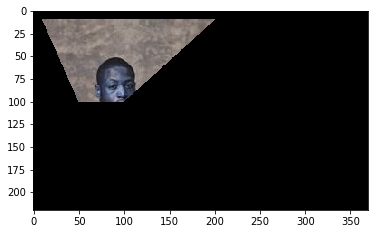

In [79]:
img = cv2.imread('1.jpg')
points = np.array([[10, 10],[50, 100],[100,100],[200,10]], np.int32)
roi = get_roi(img, points)
plt.imshow(roi)

In [80]:
# 视频
cap = cv2.VideoCapture(0)
ret, image = cap.read()
shape = image.shape
points = np.array([[10, 10],[10, 500],[400,400],[500,10]], np.int32)
mask = get_mask(points, shape)
while ret:
    roi = cv2.bitwise_and(image, mask)
#     roi = get_roi(image, points)
    cv2.imshow('name', roi)
    ret, image = cap.read()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [53]:
cap.release()